In [3]:
#BASIC LIBRARIES NEEDED:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import folium
from geopy.geocoders import Nominatim
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import linear_kernel,  cosine_similarity
%matplotlib inline

In [4]:
# !pip uninstall keras     # ONLY TO BE RUN IF ISSUES / ERROR WITH KERAS ARE NOT GETTING RESOLVED : LIKE A RESTART BUTTON
!pip install keras

In [5]:
#MAKING SURE KERAS IS INSTALLED
!pip install keras
import keras

In [ ]:
!pip install --upgrade keras
#ONLY TO BE RUN IF ERRORS IN KERAS MODULE ARE NOT GETTING RESOLVED

In [6]:
#ML MODEL,UTILITIES,PACKAGES FROM SCIENTIFIC KIT AND ACCURACY METRICS LOADED :
from keras.models import Sequential
#from keras.layers.core import Dense,Activation,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from keras.callbacks import EarlyStopping
import math
import os


In [7]:
#FOR CONTENT BASED AND COLLABORATIVE FILTERING + CASE BASED RECOMMENDATION NLP PACKAGES FOR DESCRIPTION MATCH ARE LOADED:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### FIRST Using a Hotel dataset as a training dataset to train the model.

##LOADING DATASET

In [10]:
Hotel_details = pd.read_csv('/content/drive/MyDrive/DATA_CSV/Hotel_details.csv')
Hotel_rooms = pd.read_csv('/content/drive/MyDrive/DATA_CSV/Hotel_Room_attributes.csv')
Hotel_price = pd.read_csv('/content/drive/MyDrive/DATA_CSV/hotels_RoomPrice.csv')

In [11]:
#vizualisation:
Hotel_details.head()


,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR


In [12]:
Hotel_rooms.head(2)

,id,hotelcode,roomamenities,roomtype,ratedescription
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed"
1,50672149,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."


In [ ]:
Hotel_price.head(2)

,id,refid,hotelcode,websitecode,dtcollected,ratedate,los,guests,roomtype,onsiterate,...,promoname,status_code,taxstatus,taxtype,taxamount,proxyused,israteperstay,mealinclusiontype,hotelblock,input_dtcollected
0,50677497,8646773,634876,5,2019-10-12 15:46:54,2019-11-02,1,1,Double Room,82.36,...,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.165.126:80,Y,Free Breakfast,NaN,2019-10-13
1,50672149,6234691,8328096,5,2019-10-12 15:47:45,2019-11-30,1,1,Vacation Home,636.09,...,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.164.126:80,Y,NaN,NaN,2019-10-13


##DATA EXPLORATION

In [13]:
Hotel_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            108048 non-null  int64  
 1   hotelid       108048 non-null  int64  
 2   hotelname     108048 non-null  object 
 3   address       102955 non-null  object 
 4   city          108047 non-null  object 
 5   country       108048 non-null  object 
 6   zipcode       83486 non-null   float64
 7   propertytype  108048 non-null  object 
 8   starrating    108048 non-null  int64  
 9   latitude      108048 non-null  float64
 10  longitude     108048 non-null  float64
 11  Source        108048 non-null  int64  
 12  url           107937 non-null  object 
 13  curr          108048 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 11.5+ MB


In [14]:
Hotel_details.isna().sum()

id                  0
hotelid             0
hotelname           0
address          5093
city                1
country             0
zipcode         24562
propertytype        0
starrating          0
latitude            0
longitude           0
Source              0
url               111
curr                0
dtype: int64

In [15]:
Hotel_details.describe()

,id,hotelid,zipcode,starrating,latitude,longitude,Source
count,108048.00000,1.080480e+05,8.348600e+04,108048.000000,108048.000000,108048.000000,108048.000000
mean,100429.50000,1.196298e+06,4.814535e+04,3.186537,46.770001,8.345943,3.087461
std,31190.91528,2.096632e+06,9.635945e+04,0.665614,5.438123,9.119117,1.442162
min,46406.00000,3.100000e+01,0.000000e+00,2.000000,0.000000,-111.908966,2.000000
25%,73417.75000,9.402175e+04,9.920000e+03,3.000000,43.309794,1.442162,2.000000
50%,100429.50000,3.065795e+05,3.430000e+04,3.000000,46.686896,8.975729,2.000000
75%,127441.25000,1.066211e+06,6.311000e+04,4.000000,50.777548,13.661896,5.000000
max,154453.00000,9.061192e+06,9.545142e+06,4.000000,69.536102,34.408731,5.000000


In [16]:
Hotel_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165873 entries, 0 to 165872
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               165873 non-null  int64 
 1   hotelcode        165873 non-null  int64 
 2   roomamenities    161054 non-null  object
 3   roomtype         165873 non-null  object
 4   ratedescription  161054 non-null  object
dtypes: int64(2), object(3)
memory usage: 6.3+ MB


In [17]:
#checking for null values
Hotel_rooms.isna().sum()

id                    0
hotelcode             0
roomamenities      4819
roomtype              0
ratedescription    4819
dtype: int64

In [18]:
Hotel_rooms.describe()

,id,hotelcode
count,1.658730e+05,1.658730e+05
mean,7.175720e+07,1.170720e+06
std,5.508651e+06,2.142096e+06
min,5.064343e+07,3.100000e+01
25%,6.983127e+07,8.279800e+04
50%,7.379246e+07,1.559800e+05
75%,7.482301e+07,8.096640e+05
max,8.852818e+07,8.977298e+06


In [19]:
Hotel_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165873 entries, 0 to 165872
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 165873 non-null  int64  
 1   refid              165873 non-null  int64  
 2   hotelcode          165873 non-null  int64  
 3   websitecode        165873 non-null  int64  
 4   dtcollected        165873 non-null  object 
 5   ratedate           165873 non-null  object 
 6   los                165873 non-null  int64  
 7   guests             165873 non-null  int64  
 8   roomtype           165873 non-null  object 
 9   onsiterate         165873 non-null  float64
 10  netrate            165873 non-null  float64
 11  currency           165873 non-null  object 
 12  ratedescription    161054 non-null  object 
 13  ratetype           161054 non-null  object 
 14  sourceurl          165873 non-null  object 
 15  roomamenities      161054 non-null  object 
 16  ma

In [20]:
Hotel_price.isna().sum()

id                        0
refid                     0
hotelcode                 0
websitecode               0
dtcollected               0
ratedate                  0
los                       0
guests                    0
roomtype                  0
onsiterate                0
netrate                   0
currency                  0
ratedescription        4819
ratetype               4819
sourceurl                 0
roomamenities          4819
maxoccupancy              0
ispromo                   0
closed                    0
discount                  0
promoname            162696
status_code               0
taxstatus                 0
taxtype                8370
taxamount                 0
proxyused                 0
israteperstay             0
mealinclusiontype     68486
hotelblock           161054
input_dtcollected         0
dtype: int64

In [21]:
Hotel_price.describe()

,id,refid,hotelcode,websitecode,los,guests,onsiterate,netrate,maxoccupancy,discount,status_code,taxstatus,taxamount
count,1.658730e+05,1.658730e+05,1.658730e+05,165873.0,165873.0,165873.0,165873.000000,165873.000000,165873.000000,165873.000000,165873.000000,165873.000000,165873.0
mean,7.175720e+07,7.966514e+06,1.170720e+06,5.0,1.0,1.0,138.664832,96.026202,1.653313,13.964018,200.029052,1.912843,0.0
std,5.508651e+06,1.047668e+06,2.142096e+06,0.0,0.0,0.0,192.170226,171.384578,0.883092,21.950920,0.167954,0.503861,0.0
min,5.064343e+07,6.198276e+06,3.100000e+01,5.0,1.0,1.0,0.000000,0.000000,1.000000,0.000000,200.000000,-1.000000,0.0
25%,6.983127e+07,7.008498e+06,8.279800e+04,5.0,1.0,1.0,78.320000,0.000000,1.000000,0.000000,200.000000,2.000000,0.0
50%,7.379246e+07,7.951929e+06,1.559800e+05,5.0,1.0,1.0,110.190000,0.000000,1.000000,0.000000,200.000000,2.000000,0.0
75%,7.482301e+07,8.898952e+06,8.096640e+05,5.0,1.0,1.0,160.500000,163.850000,2.000000,25.320000,200.000000,2.000000,0.0
max,8.852818e+07,9.713869e+06,8.977298e+06,5.0,1.0,1.0,18083.360000,15081.820000,24.000000,99.650000,201.000000,2.000000,0.0


##1)DATA CLEANING

In [22]:
#to avoid loss of original dataset
hotel_details1 = pd.DataFrame(Hotel_details)
hotel_rooms1 = pd.DataFrame(Hotel_rooms)
hotel_price1 = pd.DataFrame(Hotel_price)

In [23]:
#removing not useful data columns
del hotel_details1['id']
del hotel_rooms1['id']
del hotel_details1['zipcode']


missing values in categorial variable : 1) replace by mode if insignificant null values i.e. fill in most frequent values ,2)Fill NaN (df.fillna()) or ignore ,3)predictive filling,4)fill category with probability,5)one-hot-encoding: to maintain history of missingness,6)KNN models

In [24]:
hotel_rooms1.shape


(165873, 4)

In [25]:
#here after removing Zipcode , the null values are mostly in URL and how to reach address
#both features are not to be directly used for our recommendation model so it is best to drop the null values
hotel_details1 = hotel_details1.dropna()
#similarly for rooms1 data the null values are less compared to total values
hotel_rooms1 = hotel_rooms1.dropna()

In [26]:
del hotel_details1['curr']
del hotel_details1['url']
del hotel_details1['Source']

In [27]:
hotel_details1.drop_duplicates(subset='hotelid',keep=False,inplace=True)
hotel_details1.head(2)

,hotelid,hotelname,address,city,country,propertytype,starrating,latitude,longitude
0,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,Holiday parks,4,43.440124,16.682505
1,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,Hotels,3,53.012329,18.603800


In [28]:
hotel_rooms1.drop_duplicates(subset='hotelcode',keep=False,inplace=True)
hotel_rooms1.head(2)

,hotelcode,roomamenities,roomtype,ratedescription
1,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
862,467365,Air conditioning: ;Alarm clock: ;Closet: ;Clot...,Standard Family Room (2 Adults + 2 Children),"Room size: 25 m²/269 ft², Shower, 2 double beds"


CREATING FINAL DATASET AFTER PREPROCESSING AND FEATURE ENGINEERING

In [29]:
#WE'LL BE CREATING AND TRAINING THE COMPLETE DATASET IN 2 PARTS : 1)WITHOUT PRICE AS FEATURE 2) WITH PRICE - FINAL DATASET & MODEL
#1)
#MERGING THE 2 PREPROCESSED DATASET : inner join by hotelcode(hotel_rooms1) & hotelid (hotel_details1)
hoteldf = pd.merge(hotel_rooms1,hotel_details1,left_on='hotelcode',right_on='hotelid',how='inner')

In [30]:
hoteldf.columns

Index(['hotelcode', 'roomamenities', 'roomtype', 'ratedescription', 'hotelid',
       'hotelname', 'address', 'city', 'country', 'propertytype', 'starrating',
       'latitude', 'longitude'],
      dtype='object')

In [31]:
#now hotelid can be removed as hotelcode is present also later onwards when price feature df needs to be added it also only has hotelcode
del hoteldf['hotelid']


In [32]:
#vizualization of hoteldf
print(f' \n',hoteldf.columns,'\n')
print(hoteldf.shape)
hoteldf.head(2)


 
 Index(['hotelcode', 'roomamenities', 'roomtype', 'ratedescription',
       'hotelname', 'address', 'city', 'country', 'propertytype', 'starrating',
       'latitude', 'longitude'],
      dtype='object') 

(318, 12)


,hotelcode,roomamenities,roomtype,ratedescription,hotelname,address,city,country,propertytype,starrating,latitude,longitude
0,467365,Air conditioning: ;Alarm clock: ;Closet: ;Clot...,Standard Family Room (2 Adults + 2 Children),"Room size: 25 m²/269 ft², Shower, 2 double beds",Hotel Kirchenwirt,Margeritenweg 2,Bad Kleinkirchheim,Austria,Hotels,3,46.815220,13.79772
1,306562,Air conditioning: ;Carpeting: ;Closet: ;Desk: ...,Double Room,"Room size: 18 m²/194 ft², Shower, 1 double bed",Innkeeper's Lodge Lichfield,"The Hedgehog Vintage Inn, Stafford Road",Lichfield,United Kingdom,Hotels,3,52.692291,-1.84978


In [33]:
room_no=[
     ('king',2),
   ('queen',2),
    ('triple',3),
    ('master',3),
   ('family',4),
   ('murphy',2),
   ('quad',4),
   ('double-double',4),
   ('mini',2),
   ('studio',1),
    ('junior',2),
   ('apartment',4),
    ('double',2),
   ('twin',2),
   ('double-twin',4),
   ('single',1),
     ('diabled',1),
   ('accessible',1),
    ('suite',2),
    ('one',2)
   ]

In [34]:
def calc():
    guests_no=[]
    for i in range(hoteldf.shape[0]):
        temp=hoteldf['roomtype'][i].lower().split()
        flag=0
        for j in range(len(temp)):
            for k in range(len(room_no)):
                if temp[j]==room_no[k][0]:
                    guests_no.append(room_no[k][1])
                    flag=1
                    break
            if flag==1:
                break
        if flag==0:
            guests_no.append(2)
    hoteldf['guests_no']=guests_no

calc()

In [35]:
#in order to further simplify the process of collaborative filtering :
#we are gonna merge roomamenities and ratedescription in one column called description
hoteldf['description'] = hoteldf['roomamenities'] + hoteldf['ratedescription']

In [36]:
del hoteldf['roomamenities']
del hoteldf['ratedescription']

In [37]:
#including all so that unique non-numerical type col is also described
hoteldf.describe(include='all')

,hotelcode,roomtype,hotelname,address,city,country,propertytype,starrating,latitude,longitude,guests_no,description
count,3.180000e+02,318,318,318,318,318,318,318.000000,318.000000,318.000000,318.000000,318
unique,NaN,124,317,317,293,26,3,NaN,NaN,NaN,NaN,314
top,NaN,Double Room,Hotel de L'Europe,Station Road,London,United Kingdom,Hotels,NaN,NaN,NaN,NaN,Air conditioning: ;Free Wi-Fi in all rooms!: ;...
freq,NaN,68,2,2,5,100,316,NaN,NaN,NaN,NaN,3
mean,2.461078e+06,NaN,NaN,NaN,NaN,NaN,NaN,3.059748,48.493613,5.489240,2.081761,NaN
std,2.913448e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.714573,5.362770,9.453195,0.678359,NaN
min,3.330000e+02,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,27.783159,-15.518270,1.000000,NaN
25%,3.070105e+05,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,45.434204,-2.248277,2.000000,NaN
50%,6.496140e+05,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,48.714895,4.072738,2.000000,NaN
75%,4.905592e+06,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,52.484504,12.321383,2.000000,NaN


#Drawn essences from above:
#### - Hotel de L'Europe,London(city) and double room are the highest instance  values in dataset.

#### - UK has the most no of hotels
#### - double room type being most in demand
#### - and in ammenities , AC and Free wifi are the top description






In [38]:
hoteldf.duplicated().sum()

0

In [39]:
hoteldf.isna().sum().sum()

0

In [40]:
hoteldf.head()

,hotelcode,roomtype,hotelname,address,city,country,propertytype,starrating,latitude,longitude,guests_no,description
0,467365,Standard Family Room (2 Adults + 2 Children),Hotel Kirchenwirt,Margeritenweg 2,Bad Kleinkirchheim,Austria,Hotels,3,46.815220,13.79772,4,Air conditioning: ;Alarm clock: ;Closet: ;Clot...
1,306562,Double Room,Innkeeper's Lodge Lichfield,"The Hedgehog Vintage Inn, Stafford Road",Lichfield,United Kingdom,Hotels,3,52.692291,-1.84978,2,Air conditioning: ;Carpeting: ;Closet: ;Desk: ...
2,8965903,Four-Bedroom House,house Jadranovo,8 Obala,Jadranovo,Croatia,Hotels,4,45.231529,14.61234,2,Additional toilet: ;Air conditioning: ;Coffee/...
3,1461626,Economy Double Room,The Invisible Hotel -- Urban Flashbacks,Juzna trieda 117,Kosice,Slovakia,Hotels,3,48.698261,21.26322,2,Air conditioning: ;Alarm clock: ;Carpeting: ;C...
4,586055,Standard Single Room,Number One,"1 Windsor Villas, Lockyer Street",Plymouth,United Kingdom,Hotels,4,50.367298,-4.14347,1,Air conditioning: ;Carpeting: ;Closet: ;Free W...


#DATA VISUALIZATION :

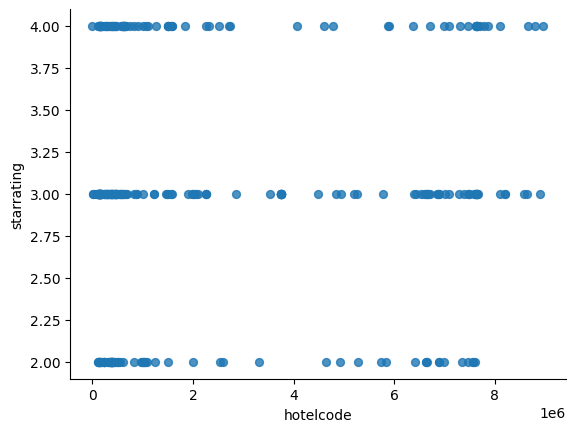

In [41]:
# @title hotelcode vs starrating

from matplotlib import pyplot as plt
hoteldf.plot(kind='scatter', x='hotelcode', y='starrating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [42]:
#grouping hotels by city they are present in :
city_counts = hoteldf['city'].value_counts().sort_values(ascending=False)
#picking out the first 15 cities with most hotels for ease of vizualization and analysis on graph:
#representing every city in dataset on graph will give a less effective graph:
city_counts_1 = pd.DataFrame(hoteldf['city'].value_counts().sort_values(ascending=False)[:15])
print(f"Top 5 Cities with most hotels :\n{city_counts.head()}")

Top 5 Cities with most hotels :
city
London        5
Venice        3
Paris         3
Sunderland    3
Prague        3
Name: count, dtype: int64


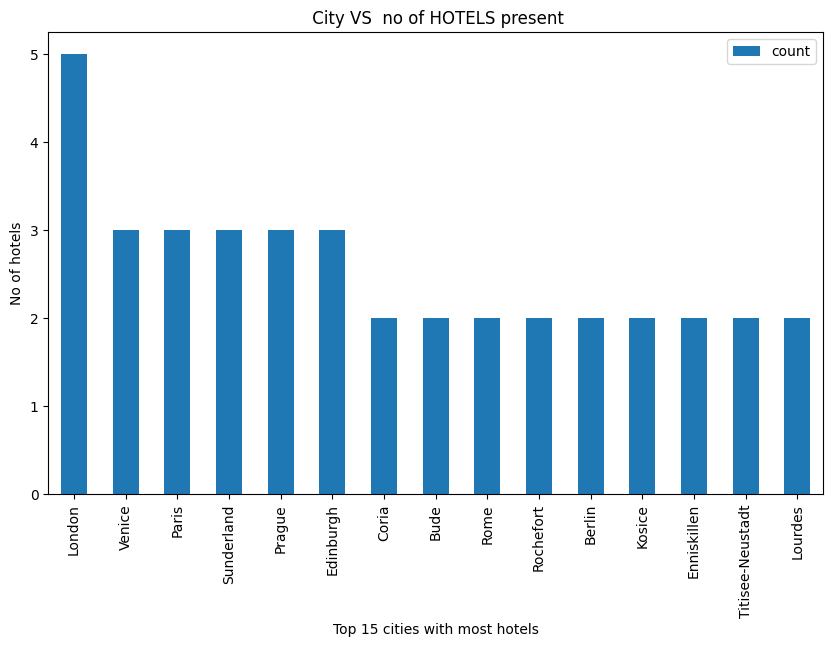

In [43]:
# @title top 15 Cities VS no of Hotels present
##plotting the analysis for top 15 cities:
import seaborn as sns
city_counts_1.plot(kind='bar',figsize=(10,6))
plt.title(' City VS  no of HOTELS present')
plt.xlabel('Top 15 cities with most hotels')
plt.ylabel('No of hotels')
plt.show()

#BUILDING RECOMMENDER SYSTEM
##1)WITHOUT PRICE AS A FEATURE:


###CONTENT BASED COLLABORATIVE FILTERING

In [44]:
hoteldf.columns

Index(['hotelcode', 'roomtype', 'hotelname', 'address', 'city', 'country',
       'propertytype', 'starrating', 'latitude', 'longitude', 'guests_no',
       'description'],
      dtype='object')

In [45]:
def citybased(city) :
    #converting all city names into lowercase for maintaining consistency and case-insensetiveness
    #for later on comparisons with user input
    hoteldf['city'] = hoteldf['city'].str.lower()
    #only filtering out columns that match input city from dataframe
    #the comparision between input and col data is done in lower case
    #by always converting user input(given as parameter for this function) to lower
    citybase = hoteldf[hoteldf['city']==city.lower()]
    #now sorting the retrived data in a way that hotels with Higher rating are outputed as results first
    citybase = citybase.sort_values(by='starrating',ascending=False)
    #Making sure any two or more instances of same hotel are removed , by using hotelcode , so that
    #every unique hotel is outputed only once as a result
    citybase.drop_duplicates(subset='hotelcode',keep='first',inplace=True)
    #checking if Hotels are availabe in the queried city:
    #i.e. if citybase is Non-empty then hotels are availabe:
    if(citybase.empty==0):
      havail = citybase[['hotelname','starrating','address','description']]
      return havail.head(15)
       #info of hotels available in that city:
    else :
      print('NO HOTELS FOUND , TRY A DIFFERENT LOCATION ?')



In [46]:
print(' AVAILABLE HOTELS : ')
citybased('Venice')

 AVAILABLE HOTELS : 


,hotelname,starrating,address,description
182,Hotel Ca' Nobile Corner,3,Sestiere DORSODURO 2931 Campo Santa Margherita,Air conditioning: ;Bathrobes: ;Closet: ;Clothe...
251,Hotel Piccola Fenice,3,San Marco 3614,Air conditioning: ;Closet: ;Coffee/tea maker: ...
165,Hotel Tivoli,2,Crosera San Pantalon - Dorsoduro 3838,Air conditioning: ;Alarm clock: ;Closet: ;Clot...


In [47]:
###replacing the  ; characters in description with ,
hoteldf['description']=hoteldf['description'].str.replace(': ;',',')

In [48]:
hoteldf['description']

0      Air conditioning,Alarm clock,Closet,Clothes ra...
1      Air conditioning,Carpeting,Closet,Desk,Free Wi...
2      Additional toilet,Air conditioning,Coffee/tea ...
3      Air conditioning,Alarm clock,Carpeting,Cleanin...
4      Air conditioning,Carpeting,Closet,Free Wi-Fi i...
                             ...                        
313    Air conditioning,Closet,Free bottled water,Fre...
314    Air conditioning,Blackout curtains,Carpeting,C...
315    Air conditioning,Carpeting,Cleaning products,C...
316    Air conditioning,Closet,Free Wi-Fi in all room...
317    Air conditioning,Free Wi-Fi in all rooms!,In-r...
Name: description, Length: 318, dtype: object

##Recommender engine that filters on the basis of both city and hotel features inputed in user space

In [49]:
def requirementbased(city,features):
    hoteldf['city']=hoteldf['city'].str.lower()
    hoteldf['description']=hoteldf['description'].str.lower()
    features=features.lower()
    features_tokens=word_tokenize(features)
    sw = stopwords.words('english')
    lemm = WordNetLemmatizer()
    f1_set = {w for w in features_tokens if not w in sw}
    f_set=set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))
    reqbased=hoteldf[hoteldf['city']==city.lower()]
    reqbased=reqbased.set_index(np.arange(reqbased.shape[0]))
    l1 =[];l2 =[];cos=[];
    #print(reqbased['roomamenities'])
    for i in range(reqbased.shape[0]):
        temp_tokens=word_tokenize(reqbased['description'][i])
        temp1_set={w for w in temp_tokens if not w in sw}
        temp_set=set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        rvector = temp_set.intersection(f_set)
        #print(rvector)
        cos.append(len(rvector))
    reqbased['similarity']=cos
    reqbased=reqbased.sort_values(by='similarity',ascending=False)
    reqbased.drop_duplicates(subset='hotelcode',keep='first',inplace=True)
    return reqbased[['hotelname','roomtype','starrating','address','description','similarity']].head(15)

##CITY AND DESCRIPTION BASED RECOMMENDER

In [50]:
print('Available hotels : ')
requirementbased('London','I need a extra toilet and room should be completely air conditioned.I should have a bathrobe.Also i need free wifi')

Available hotels : 


,hotelname,roomtype,starrating,address,description,similarity
0,The Troubadour London,One-Bedroom Apartment,3,263-267 Old Brompton Road,"air conditioning,free wi-fi in all rooms!,hair...",3
1,The Old House Inn,Classic Room,4,Effingham Road,"air conditioning,alarm clock,bathrobes,closet,...",3
2,Lancaster Hotel and Spa,Deluxe Double Room,3,Brunel University London,"air conditioning,carpeting,closet,desk,fan,fre...",3
3,Excel Apartments Old Street,One Bedroom Apartment,4,Banner Street,"air conditioning,carbon monoxide detector,clos...",3
4,Travelodge London Richmond Central,Double Room,3,9 Paradies Road,"air conditioning,free wi-fi in all rooms!,heat...",3


#Working on Recommender engine that uses city,price and description as feature for recommendations

In [51]:
hotel_price1.columns

Index(['id', 'refid', 'hotelcode', 'websitecode', 'dtcollected', 'ratedate',
       'los', 'guests', 'roomtype', 'onsiterate', 'netrate', 'currency',
       'ratedescription', 'ratetype', 'sourceurl', 'roomamenities',
       'maxoccupancy', 'ispromo', 'closed', 'discount', 'promoname',
       'status_code', 'taxstatus', 'taxtype', 'taxamount', 'proxyused',
       'israteperstay', 'mealinclusiontype', 'hotelblock',
       'input_dtcollected'],
      dtype='object')

In [52]:
hotel_price2 = pd.DataFrame(hotel_price1.drop(['id','refid','websitecode','dtcollected','ratedate','los','guests','roomtype','netrate','ratedescription','ratetype','sourceurl','roomamenities'
,'ispromo','closed','discount','promoname','status_code','taxstatus','taxtype','taxamount','proxyused','israteperstay','hotelblock','input_dtcollected'],axis=1))

In [53]:
hotel_price2.columns

Index(['hotelcode', 'onsiterate', 'currency', 'maxoccupancy',
       'mealinclusiontype'],
      dtype='object')

In [54]:
hoteldf.columns


Index(['hotelcode', 'roomtype', 'hotelname', 'address', 'city', 'country',
       'propertytype', 'starrating', 'latitude', 'longitude', 'guests_no',
       'description'],
      dtype='object')

In [55]:
hoteldf = pd.merge(hoteldf,hotel_price2,left_on=['hotelcode','guests_no'],right_on=['hotelcode','maxoccupancy'],how='inner')

In [56]:
hoteldf.head()

,hotelcode,roomtype,hotelname,address,city,country,propertytype,starrating,latitude,longitude,guests_no,description,onsiterate,currency,maxoccupancy,mealinclusiontype
0,306562,Double Room,Innkeeper's Lodge Lichfield,"The Hedgehog Vintage Inn, Stafford Road",lichfield,United Kingdom,Hotels,3,52.692291,-1.849780,2,"air conditioning,carpeting,closet,desk,free wi...",90.81,USD,2,NaN
1,586055,Standard Single Room,Number One,"1 Windsor Villas, Lockyer Street",plymouth,United Kingdom,Hotels,4,50.367298,-4.143470,1,"air conditioning,carpeting,closet,free wi-fi i...",62.30,USD,1,Free Breakfast
2,7860975,Deluxe Queen Room,Molnos Kuria Pension,"760, Main street",corund,Romania,Hotels,4,46.471600,25.183729,2,"air conditioning,bathrobes,carpeting,closet,cl...",126.89,USD,2,Free breakfast for {2}
3,8104050,Deluxe King Room,Quattro Gatti Rooms&Suite,12 Via Don Giavazzi,verdello,Italy,Hotels,4,45.606880,9.625190,2,"air conditioning,closet,clothes rack,extra lon...",80.37,USD,2,Free breakfast for {2}
4,600576,Twin Room,The Darnley Arms,40 The Street,shorne,United Kingdom,Hotels,4,51.390461,0.399490,2,"air conditioning,carpeting,closet,free wi-fi i...",68.64,USD,2,NaN


##BUILDING :
# Bhubaneswar PG RECOMMENDER SYSTEM

##1)LOADING DATASET

In [57]:
pgdata = pd.read_csv('/content/drive/MyDrive/Book1.csv')

##2)DATA EXPLORATION

In [58]:
pgdata.head()

,Name,Address,Price,Gender,Description,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,sharing,PGID,Rating
0,Khandagiri Stay PG/Paying Guest,Khandagiri,6000,Boys,"Khandagiri Stay, professionally managed PG hom...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single-Double,PG1,5
1,Vaishnavi Ladies PG/Paying Guest,Chandrasekharpur,"2,500",Girls,"Vaishnavi PG, Professionally Managed PG Home, ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Double-Triple,PG2,4
2,The Basic PG/Paying Guest only for Professionals,Gajapati Nagar,"8,500",Coed,"The Basic, A professionally managed PG home, G...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single-Double,PG3,3
3,AuroMaa PG/Paying Guest,Rasulgarh,5500,Boys,"Rasulgarh, Bhubaneswar, AuroMaa PG, modern ,s...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Double,PG4,4
4,Devi Girls Hostel PG/Paying Guest,Jayadev Vihar,"2,499",Girls,"Devi Girls Hostel, professionally managed, PG...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Triple,PG5,5


In [59]:
pgdata.columns

Index(['Name', 'Address', 'Price', 'Gender', 'Description', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'sharing', 'PGID', 'Rating'],
      dtype='object')

In [60]:
pgdata.isna().sum()

Name            0
Address         0
Price           0
Gender          0
Description     0
Unnamed: 5     30
Unnamed: 6     30
Unnamed: 7     30
Unnamed: 8     30
Unnamed: 9     30
Unnamed: 10    30
Unnamed: 11    30
Unnamed: 12    30
Unnamed: 13    30
Unnamed: 14    30
Unnamed: 15    30
Unnamed: 16    30
Unnamed: 17    30
Unnamed: 18    30
Unnamed: 19    30
Unnamed: 20    30
Unnamed: 21    30
Unnamed: 22    30
Unnamed: 23    30
Unnamed: 24    30
Unnamed: 25    30
Unnamed: 26    30
Unnamed: 27    30
Unnamed: 28    30
Unnamed: 29    30
Unnamed: 30    30
Unnamed: 31    30
Unnamed: 32    30
Unnamed: 33    30
Unnamed: 34    30
Unnamed: 35    30
Unnamed: 36    30
Unnamed: 37    30
Unnamed: 38    30
Unnamed: 39    30
sharing         0
PGID            0
Rating          0
dtype: int64

In [61]:
#dataset after droping all null and unnamed value columns
pg_df = pd.DataFrame(pgdata[['Name','Address','Price','Gender','Description','PGID','sharing','Rating']])
pg_df.dropna()
pg_df.head(5)

,Name,Address,Price,Gender,Description,PGID,sharing,Rating
0,Khandagiri Stay PG/Paying Guest,Khandagiri,6000,Boys,"Khandagiri Stay, professionally managed PG hom...",PG1,Single-Double,5
1,Vaishnavi Ladies PG/Paying Guest,Chandrasekharpur,"2,500",Girls,"Vaishnavi PG, Professionally Managed PG Home, ...",PG2,Double-Triple,4
2,The Basic PG/Paying Guest only for Professionals,Gajapati Nagar,"8,500",Coed,"The Basic, A professionally managed PG home, G...",PG3,Single-Double,3
3,AuroMaa PG/Paying Guest,Rasulgarh,5500,Boys,"Rasulgarh, Bhubaneswar, AuroMaa PG, modern ,s...",PG4,Double,4
4,Devi Girls Hostel PG/Paying Guest,Jayadev Vihar,"2,499",Girls,"Devi Girls Hostel, professionally managed, PG...",PG5,Triple,5


##Vizualisation of available PG type based on Gender

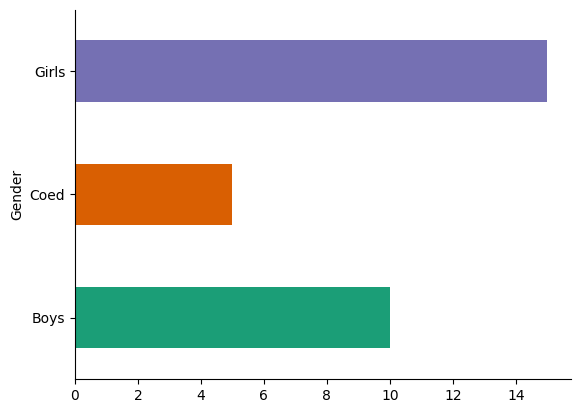

In [62]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
pg_df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [63]:
pg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         30 non-null     object
 1   Address      30 non-null     object
 2   Price        30 non-null     object
 3   Gender       30 non-null     object
 4   Description  30 non-null     object
 5   PGID         30 non-null     object
 6   sharing      30 non-null     object
 7   Rating       30 non-null     int64 
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [64]:
pg_df.isna().sum()

Name           0
Address        0
Price          0
Gender         0
Description    0
PGID           0
sharing        0
Rating         0
dtype: int64

In [65]:
pg_df.isna().sum().sum()

0

In [66]:
pg_df.shape

(30, 8)

In [67]:
#checking to remove any duplicates value.
pg_df.drop_duplicates(subset='PGID',keep=False,inplace=True)
pg_df.shape

(30, 8)

###observation : no duplicate data present in scrapped data.Fit to use for collaborative content filtering

In [68]:
# pg_df.describe(include='all')
pg_df.describe()

,Rating
count,30.00000
mean,3.90000
std,1.09387
min,2.00000
25%,3.00000
50%,4.00000
75%,5.00000
max,5.00000


# Popularity Based filtering

In [69]:
no_products_rated_per_user=pg_df.groupby(by="Gender")['Rating'].count().sort_values(ascending=False)

In [70]:
print(f"Products rated more than 50 per user: {sum(no_products_rated_per_user>=3)}")

Products rated more than 50 per user: 3


In [71]:
df=pg_df.groupby(by='Address').filter(lambda x:x['Rating'].count()>=3)

In [72]:
df.head(15)

,Name,Address,Price,Gender,Description,PGID,sharing,Rating
5,Prasanta Hostel PG/Paying Guest,Nayapalli,2600,Girls,"Prasanta hostel,prime location in bhubaneswar,...",PG6,Triple,5
6,Executive Ladies PG/Paying Guest Cum Girls Hostel,Nayapalli,3500,Girls,"Ladies PG, a professionally managed PG home,Na...",PG7,Double-Triple,3
7,Paying Guest House - PG,Patia,8500,Boys,"Patia, Bhubaneswar, Paying Guest House , moder...",PG8,Single-Double-Triple,2
9,Goshelter PG/Paying Guest and hostels for Boys...,Patia,3900,Coed,"Goshelter pg and hostels, for Boys and Girls, ...",PG10,Single-Double-Triple-Four,5
10,Pabitra Mohan House PG/Paying Guest,Nayapalli,2100,Girls,"Pabitra Mohan House, a professionally managed,...",PG11,Single-Double-Triple-Four,2
11,Swastik Ladies Hostel PG/Paying Guest,Nayapalli,2199,Girls,"Swastik Ladies Hostel, Finest Level of Hospita...",PG12,Single-Double,5
12,Dream Home PG/Paying Guest For Boys,Nayapalli,10500,Boys,"Dream Home PG , For Boys, professionally mana...",PG13,Double-Triple,4
14,Binayak Plaza PG/Paying Guest,Nayapalli,15600,Coed,"Nayapalli, Bhubaneswar, Binayak Plaza , moder...",PG15,Single,5
22,PatiaSingle Room in a 3 Bhk apartment,Patia,4600,Boys,"Infocity, Bhubaneswar, 3 bedroom property , mo...",PG23,Double,4


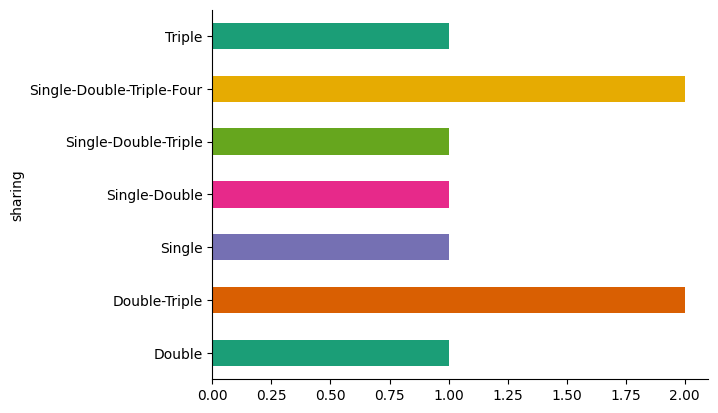

In [73]:
# @title sharing

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sharing').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##Drawn essence from above:
-Nayapalli has most no of Paying guests

-The average PG price is 6000

-More no of Girl PG options are available

-Top descriptions being a professionally managed accomodation , Khandagiri stay,etc.

In [74]:
pg_df.columns

Index(['Name', 'Address', 'Price', 'Gender', 'Description', 'PGID', 'sharing',
       'Rating'],
      dtype='object')

In [75]:
pg_df['Price'] = pg_df['Price'].str.replace(',', '').astype(float)


In [76]:
pg_df['Description'] = pg_df['Description'].str.replace('.',',')

In [77]:
#first address based recommendation engine :
def addrbased(Address):
  #converting all dataset input to lowercase for purpouse of comparision
    pg_df['Address']=pg_df['Address'].str.lower()
    #maintaining consistency of comparison
    addrbase=pg_df[pg_df['Address'] == Address.lower()]
    #recommending the cheapest PG's first
    addrbase=addrbase.sort_values(by='Price',ascending=True)
    #making sure no two same PGs are outputed : not needed but due to our preprocessing step
    addrbase.drop_duplicates(subset='PGID',keep='first',inplace=True)
    #if the addr base is not empty : i.e. available PGs exist
    if(addrbase.empty==0):
        avail =addrbase[['Name','Address','Gender','Description','PGID','sharing']]
        return avail.head()
    else:
        print('No available PG found :( /n try another input ? \n')

In [78]:
#ALL available addresses in dataset
pg_df['Address']

0            Khandagiri
1      Chandrasekharpur
2        Gajapati Nagar
3             Rasulgarh
4         Jayadev Vihar
5             Nayapalli
6             Nayapalli
7                 Patia
8         Niladri Vihar
9                 Patia
10            Nayapalli
11            Nayapalli
12            Nayapalli
13         Saheed Nagar
14            Nayapalli
15             Jagamara
16       Kalpana Square
17         Raghunathpur
18          Shree Vihar
19          Sahid Nagar
20             Jagamara
21               Unit 9
22                Patia
23          IRC Village
24       Gajapati Nagar
25           Khandagiri
26          KIIT Square
27     Sailashree Vihar
28       Tankapani Road
29             Bomikhal
Name: Address, dtype: object

In [79]:
#Top 5 locations in bbsr with PGs are:
top_addresses = pg_df['Address'].value_counts().head()
print("Top 5 locations in bbsr with PGs are: \n ",top_addresses)

Top 5 locations in bbsr with PGs are: 
  Address
Nayapalli         6
Patia             3
Khandagiri        2
Gajapati Nagar    2
Jagamara          2
Name: count, dtype: int64


In [80]:
# Taking an example of
print('Top PGs in Patia')
addrbased('Patia')

Top PGs in Patia


,Name,Address,Gender,Description,PGID,sharing
9,Goshelter PG/Paying Guest and hostels for Boys...,patia,Coed,"Goshelter pg and hostels, for Boys and Girls, ...",PG10,Single-Double-Triple-Four
22,PatiaSingle Room in a 3 Bhk apartment,patia,Boys,"Infocity, Bhubaneswar, 3 bedroom property , mo...",PG23,Double
7,Paying Guest House - PG,patia,Boys,"Patia, Bhubaneswar, Paying Guest House , moder...",PG8,Single-Double-Triple


In [81]:
print("Most frequent location searches : ",top_addresses,"\n")
addr1 = input("#Welcome! enter a Bbsr location (type please): ")
print('Top PG results',addr1,":")
addrbased(addr1)

Most frequent location searches :  Address
Nayapalli         6
Patia             3
Khandagiri        2
Gajapati Nagar    2
Jagamara          2
Name: count, dtype: int64 

#Welcome! enter a Bbsr location (type please): Nayapalli
Top PG results Nayapalli :


,Name,Address,Gender,Description,PGID,sharing
10,Pabitra Mohan House PG/Paying Guest,nayapalli,Girls,"Pabitra Mohan House, a professionally managed,...",PG11,Single-Double-Triple-Four
11,Swastik Ladies Hostel PG/Paying Guest,nayapalli,Girls,"Swastik Ladies Hostel, Finest Level of Hospita...",PG12,Single-Double
5,Prasanta Hostel PG/Paying Guest,nayapalli,Girls,"Prasanta hostel,prime location in bhubaneswar,...",PG6,Triple
6,Executive Ladies PG/Paying Guest Cum Girls Hostel,nayapalli,Girls,"Ladies PG, a professionally managed PG home,Na...",PG7,Double-Triple
12,Dream Home PG/Paying Guest For Boys,nayapalli,Boys,"Dream Home PG , For Boys, professionally mana...",PG13,Double-Triple


In [82]:
#creating dict for no_of_guest that can stay in diff type of accomodation:
pg_df['sharing'].unique()

array(['Single-Double', 'Double-Triple', 'Double', 'Triple',
       'Single-Double-Triple', 'Twin', 'Single-Double-Triple-Four',
       'Single', 'Single-apartment', 'Double-apartment'], dtype=object)

In [84]:
room_no = {
    'Single-Double': 12,
    'Double-Triple': 23,
    'Triple': 3,
    'Double': 2,
    'Single-Double-Triple-Four': 1234,
    'Twin': 2,
    'Single-Double-Triple': 123,
    'Single': 1,
    'Double-apartment': 2,
    'Single-apartment': 1
}


In [85]:
def calc():
    no_of_occupancy = []
    for i in range(pg_df.shape[0]):
        temp = pg_df['sharing'][i].lower().split()
        flag = 0
        for j in range(len(temp)):
            for guests in room_no:
                if temp[j] == guests.lower():
                    no_of_occupancy.append(room_no[guests])
                    flag = 1
                    break
            if flag == 1:
                break
        if flag == 0:
            no_of_occupancy.append(2)
    pg_df['no_of_occupancy'] = no_of_occupancy

calc()


In [86]:
pg_df.head(10) #new col no of occupancy added

,Name,Address,Price,Gender,Description,PGID,sharing,Rating,no_of_occupancy
0,Khandagiri Stay PG/Paying Guest,khandagiri,6000.0,Boys,"Khandagiri Stay, professionally managed PG hom...",PG1,Single-Double,5,12
1,Vaishnavi Ladies PG/Paying Guest,chandrasekharpur,2500.0,Girls,"Vaishnavi PG, Professionally Managed PG Home, ...",PG2,Double-Triple,4,23
2,The Basic PG/Paying Guest only for Professionals,gajapati nagar,8500.0,Coed,"The Basic, A professionally managed PG home, G...",PG3,Single-Double,3,12
3,AuroMaa PG/Paying Guest,rasulgarh,5500.0,Boys,"Rasulgarh, Bhubaneswar, AuroMaa PG, modern ,s...",PG4,Double,4,2
4,Devi Girls Hostel PG/Paying Guest,jayadev vihar,2499.0,Girls,"Devi Girls Hostel, professionally managed, PG...",PG5,Triple,5,3
5,Prasanta Hostel PG/Paying Guest,nayapalli,2600.0,Girls,"Prasanta hostel,prime location in bhubaneswar,...",PG6,Triple,5,3
6,Executive Ladies PG/Paying Guest Cum Girls Hostel,nayapalli,3500.0,Girls,"Ladies PG, a professionally managed PG home,Na...",PG7,Double-Triple,3,23
7,Paying Guest House - PG,patia,8500.0,Boys,"Patia, Bhubaneswar, Paying Guest House , moder...",PG8,Single-Double-Triple,2,123
8,Sai Hostel PG/Paying Guest,niladri vihar,2600.0,Girls,"Sai Hostel Center, Bhubaneswar , Distric cente...",PG9,Twin,3,2
9,Goshelter PG/Paying Guest and hostels for Boys...,patia,3900.0,Coed,"Goshelter pg and hostels, for Boys and Girls, ...",PG10,Single-Double-Triple-Four,5,1234


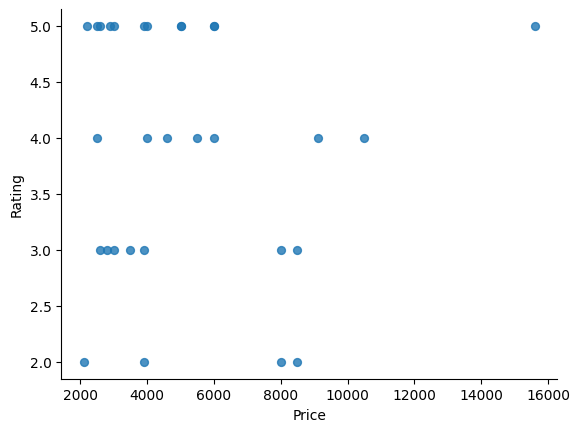

In [87]:
# @title Price vs Rating

from matplotlib import pyplot as plt
pg_df.plot(kind='scatter', x='Price', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Visualization

<ipython-input-88-e509883adfef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(pg_df, x='no_of_occupancy', y='Gender', inner='stick', palette='Dark2')


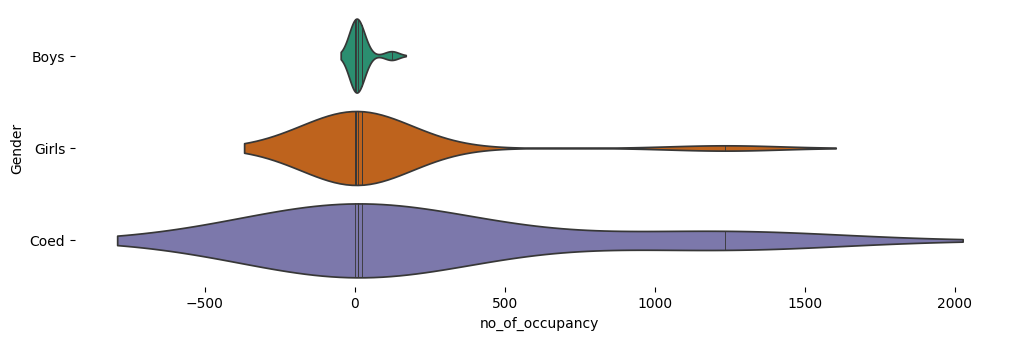

In [88]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(pg_df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(pg_df, x='no_of_occupancy', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

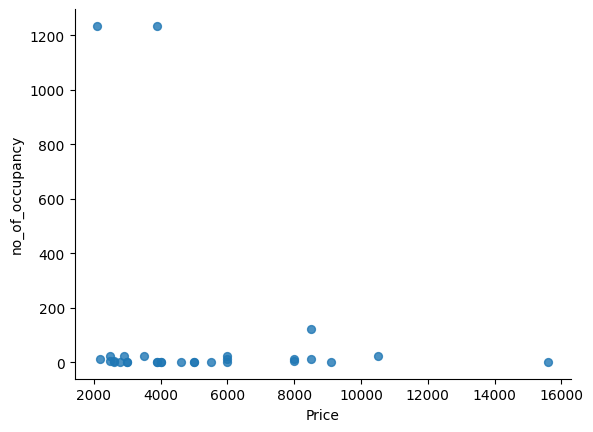

In [89]:
from matplotlib import pyplot as plt
pg_df.plot(kind='scatter', x='Price', y='no_of_occupancy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

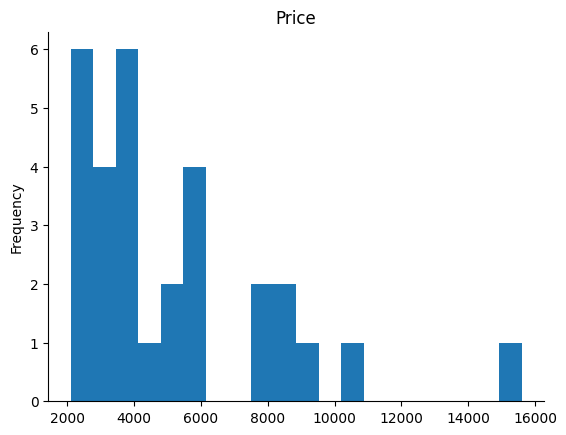

In [90]:
from matplotlib import pyplot as plt
pg_df['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-91-d7bd9e53e47b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(pg_df, x='Price', y='Gender', inner='stick', palette='Dark2')


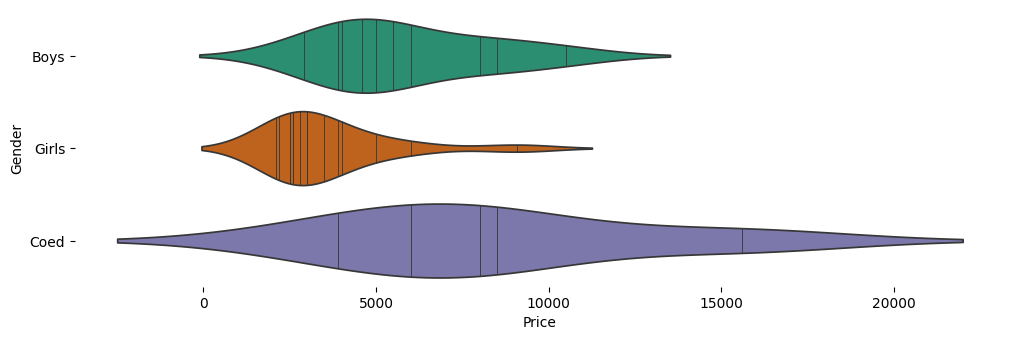

In [91]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(pg_df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(pg_df, x='Price', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [92]:
pg_df.head(2)

,Name,Address,Price,Gender,Description,PGID,sharing,Rating,no_of_occupancy
0,Khandagiri Stay PG/Paying Guest,khandagiri,6000.0,Boys,"Khandagiri Stay, professionally managed PG hom...",PG1,Single-Double,5,12
1,Vaishnavi Ladies PG/Paying Guest,chandrasekharpur,2500.0,Girls,"Vaishnavi PG, Professionally Managed PG Home, ...",PG2,Double-Triple,4,23


In [93]:
#City and no_of_occupancy available based Recommender engine:
def LocGuest(loc,occupancy):
    pg_df['Address']=pg_df['Address'].str.lower()
    LocGuest = pg_df[pg_df['Address']==loc.lower()]
    #cheapest options displayed First
    LocGuest=LocGuest[LocGuest['no_of_occupancy'] == occupancy].sort_values(by='Price',ascending=True)
    LocGuest.drop_duplicates(subset='PGID',keep='first',inplace=True)
    if LocGuest.empty==True:
        print('Sorry No Available PGs found \n Try another loc?')
    else:
        return LocGuest[['Name','Address','sharing','no_of_occupancy','Price','Description']].head()

In [94]:
print("Most frequent location searches : ",top_addresses,"\n")
loc = input("#Welcome! enter a Bbsr location (type please) :\n")
guests = int(input("enter no of guest sharing accomodation : \n menu : \n (\t Single/Double: 12,\n Double/Triple: 23,\n Triple: 3, \n Double: 2,  \n Single/Double/Triple/Four: 1234, \n 'Twin': 2,  \n 'Single/Double/Triple': 123,  \n 'Single': 1, \n 'Double/apartment': 2, \n 'Single/apartment': 1)"))
print('Top 5 PG results : ')
LocGuest(loc,guests)

Most frequent location searches :  Address
Nayapalli         6
Patia             3
Khandagiri        2
Gajapati Nagar    2
Jagamara          2
Name: count, dtype: int64 

#Welcome! enter a Bbsr location (type please) :
patia
enter no of guest sharing accomodation : 
 menu : 
 (	 Single/Double: 12,
 Double/Triple: 23,
 Triple: 3, 
 Double: 2,  
 Single/Double/Triple/Four: 1234, 
 'Twin': 2,  
 'Single/Double/Triple': 123,  
 'Single': 1, 
 'Double/apartment': 2, 
 'Single/apartment': 1)2
Top 5 PG results : 


,Name,Address,sharing,no_of_occupancy,Price,Description
22,PatiaSingle Room in a 3 Bhk apartment,patia,Double,2,4600.0,"Infocity, Bhubaneswar, 3 bedroom property , mo..."


In [95]:
pg_df.head()
#pg_df.columns

,Name,Address,Price,Gender,Description,PGID,sharing,Rating,no_of_occupancy
0,Khandagiri Stay PG/Paying Guest,khandagiri,6000.0,Boys,"Khandagiri Stay, professionally managed PG hom...",PG1,Single-Double,5,12
1,Vaishnavi Ladies PG/Paying Guest,chandrasekharpur,2500.0,Girls,"Vaishnavi PG, Professionally Managed PG Home, ...",PG2,Double-Triple,4,23
2,The Basic PG/Paying Guest only for Professionals,gajapati nagar,8500.0,Coed,"The Basic, A professionally managed PG home, G...",PG3,Single-Double,3,12
3,AuroMaa PG/Paying Guest,rasulgarh,5500.0,Boys,"Rasulgarh, Bhubaneswar, AuroMaa PG, modern ,s...",PG4,Double,4,2
4,Devi Girls Hostel PG/Paying Guest,jayadev vihar,2499.0,Girls,"Devi Girls Hostel, professionally managed, PG...",PG5,Triple,5,3


In [96]:
pg_df.columns


Index(['Name', 'Address', 'Price', 'Gender', 'Description', 'PGID', 'sharing',
       'Rating', 'no_of_occupancy'],
      dtype='object')

In [97]:
pg_df.describe(include='all')

,Name,Address,Price,Gender,Description,PGID,sharing,Rating,no_of_occupancy
count,30,30,30.000000,30,30,30,30,30.00000,30.000000
unique,29,20,NaN,3,30,30,10,NaN,NaN
top,Bed in a 2 Bhk apartment,nayapalli,NaN,Girls,"Khandagiri Stay, professionally managed PG hom...",PG1,Double-Triple,NaN,NaN
freq,2,6,NaN,15,1,1,5,NaN,NaN
mean,NaN,NaN,5189.933333,NaN,NaN,NaN,NaN,3.90000,92.866667
std,NaN,NaN,3049.354719,NaN,NaN,NaN,NaN,1.09387,311.016213
min,NaN,NaN,2100.000000,NaN,NaN,NaN,NaN,2.00000,1.000000
25%,NaN,NaN,2925.000000,NaN,NaN,NaN,NaN,3.00000,2.000000
50%,NaN,NaN,4000.000000,NaN,NaN,NaN,NaN,4.00000,2.500000
75%,NaN,NaN,6000.000000,NaN,NaN,NaN,NaN,5.00000,20.250000


In [98]:
pg_df.isna().sum()

Name               0
Address            0
Price              0
Gender             0
Description        0
PGID               0
sharing            0
Rating             0
no_of_occupancy    0
dtype: int64

#FINAL Recommender engine :
##(content based collaborative filtering)

In [99]:
pg_df['Price'] = pg_df['Price'].astype(int)

In [102]:
#City,price and no_of_occupancy available based Recommender engine:
def pgLocGuest(loc,occupancy,budget,Description):

    pg_df['Address']=pg_df['Address'].str.lower()
    #LocGuest = pg_df[pg_df['Address']==loc.lower()]
    pg_df['Price'] = pg_df['Price'].astype(int)
    #LocGuest =pg_df[pg_df['Price']<= int(budget)]
    #cheapest options displayed First
    #LocGuest=LocGuest[LocGuest['no_of_occupancy'] == occupancy].sort_values(by='Price',ascending=True)
    #LocGuest.drop_duplicates(subset='PGID',keep='first',inplace=True)

    pg_df['Description']=pg_df['Description'].str.lower()
    Description=Description.lower()
    Description_tokens=word_tokenize(Description)
    sw = stopwords.words('english')
    lemm = WordNetLemmatizer()
    f1_set = {w for w in Description_tokens if not w in sw}
    f_set=set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))
    pgLocGuest=pg_df[pg_df['Address']==loc.lower()]
    pgLocGuest =pg_df[pg_df['Price']<= int(budget)]

    pgLocGuest=pgLocGuest[pgLocGuest['no_of_occupancy'] == occupancy].sort_values(by='Price',ascending=False)
    pgLocGuest.drop_duplicates(subset='PGID',keep='first',inplace=True)

    pgLocGuest=pgLocGuest.set_index(np.arange(pgLocGuest.shape[0]))
    l1 =[];l2 =[];cos=[];
    #print(reqbased['roomamenities'])
    for i in range(pgLocGuest.shape[0]):
        temp_tokens=word_tokenize(pgLocGuest['Description'][i])
        temp1_set={w for w in temp_tokens if not w in sw}
        temp_set=set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        rvector = temp_set.intersection(f_set)
        #print(rvector)
        cos.append(len(rvector))
    pgLocGuest['similarity']=cos
    pgLocGuest=pgLocGuest.sort_values(by='similarity',ascending=False)
    pgLocGuest.drop_duplicates(subset='PGID',keep='first',inplace=True)
    if pgLocGuest.empty==True:
        print('Sorry No Available PGs found \n Try another loc or tune filters ?')
    else:
        return pgLocGuest[['Name','Address','sharing','no_of_occupancy','Price','Description','similarity','Rating']].head()


In [103]:
print("Most frequent location searches : ",top_addresses,"\n")
loc = input("#Welcome! enter a Bbsr location (type please) :\n")
guests = int(input("enter no of guest sharing accomodation : \n menu : \n (\t Single/Double: 12,\n Double/Triple: 23,\n Triple: 3, \n Double: 2,  \n Single/Double/Triple/Four: 1234, \n 'Twin': 2,  \n 'Single/Double/Triple': 123,  \n 'Single': 1, \n 'Double/apartment': 2, \n 'Single/apartment': 1)"))
budget =int(input("enter ur budget  : \n"))
described = input("any specific requirements(eg: 'safe neighbourhood','comfort',etc) : \n")
print('Top 5 PG results : ')
pgLocGuest(loc,guests,budget,described)

Most frequent location searches :  Address
Nayapalli         6
Patia             3
Khandagiri        2
Gajapati Nagar    2
Jagamara          2
Name: count, dtype: int64 

#Welcome! enter a Bbsr location (type please) :
khandagiri
enter no of guest sharing accomodation : 
 menu : 
 (	 Single/Double: 12,
 Double/Triple: 23,
 Triple: 3, 
 Double: 2,  
 Single/Double/Triple/Four: 1234, 
 'Twin': 2,  
 'Single/Double/Triple': 123,  
 'Single': 1, 
 'Double/apartment': 2, 
 'Single/apartment': 1)12
enter ur budget  : 
6000
any specific requirements(eg: 'safe neighbourhood','comfort',etc) : 
safe neighbourhood,Professionally Managed PG Home
Top 5 PG results : 


,Name,Address,sharing,no_of_occupancy,Price,Description,similarity,Rating
0,Khandagiri Stay PG/Paying Guest,khandagiri,Single-Double,12,6000,"khandagiri stay, professionally managed pg hom...",6,5
1,Swastik Ladies Hostel PG/Paying Guest,nayapalli,Single-Double,12,2199,"swastik ladies hostel, finest level of hospita...",1,5


#Rejected Algorithms:

## 1)KNN: can be used but not effecient

In [104]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162987 sha256=a670f211f071e776e342585dff7106def95cda60ce0bdaa3b7b60f687ca19916
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate, train_test_split

# Sample data (replace this with your actual PG data)
data = {
    'user_id': [1, 1, 2, 2, 3, 3, 4, 4],
    'PG_id': ['PG1', 'PG2', 'PG1', 'PG2', 'PG2', 'PG3', 'PG3', 'PG4'],
    'rating': [5, 4, 4, 3, 2, 3, 5, 4]
}

# Load data into Surprise dataset
reader = Reader(rating_scale=(1, 5))
df = Dataset.load_from_df(pd.DataFrame(data), reader)

# Split data into train and test sets
trainset, testset = train_test_split(df, test_size=0.2)

# Use K-Nearest Neighbors (KNN) algorithm for collaborative filtering
sim_options = {
    'name': 'cosine',  # Similarity metric (options: cosine, MSD, Pearson)
    'user_based': True  # User-based or item-based collaborative filtering
}
algo = KNNBasic(sim_options=sim_options)

# Train the model
algo.fit(trainset)

# Predict ratings for test set
predictions = algo.test(testset)

# Print the first few predictions
for prediction in predictions[:5]:
    print(prediction)

# Optionally, you can get recommendations for a specific user
user_id = 1
pg_ids = ['PG1', 'PG2', 'PG3', 'PG4']
for pg_id in pg_ids:
    print(f"Predicted rating for user {user_id} and PG {pg_id}: {algo.predict(user_id, pg_id).est}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
user: 3          item: PG3        r_ui = 3.00   est = 4.00   {'was_impossible': True, 'reason': 'Not enough neighbors.'}
user: 2          item: PG2        r_ui = 3.00   est = 4.00   {'actual_k': 1, 'was_impossible': False}
Predicted rating for user 1 and PG PG1: 4.5
Predicted rating for user 1 and PG PG2: 3.0
Predicted rating for user 1 and PG PG3: 4.0
Predicted rating for user 1 and PG PG4: 4.0


In [105]:
true_ratings = [p.r_ui for p in predictions]  # Get actual ratings from testset
predicted_ratings = [p.est for p in predictions]  # Get predicted ratings

NameError: name 'predictions' is not defined

In [ ]:
threshold = 3.5
true_labels = [1 if r >= threshold else 0 for r in true_ratings]
predicted_labels = [1 if r >= threshold else 0 for r in predicted_ratings]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)  # Print the matrix
# Further analysis, visualization, or metric calculations based on cm


[[0 2]
 [0 0]]


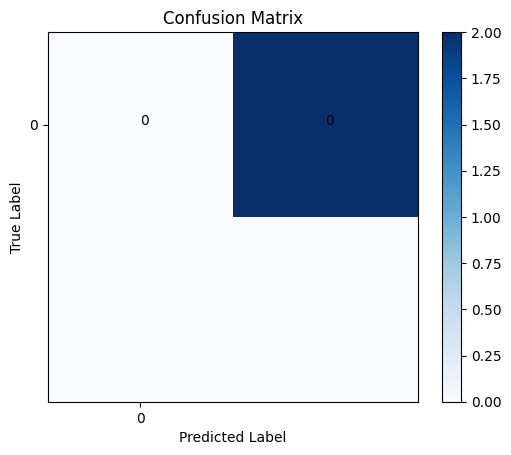

In [ ]:
import matplotlib.pyplot as plt

# Create a heatmap with annotations
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(set(predicted_labels))))
plt.yticks(np.arange(len(set(true_labels))))
plt.text(0, 0, cm[0, 0])  # Add counts for each cell
plt.text(1, 0, cm[1, 0])
# ... Similarly for other cells
plt.show()


#2)SVM : can be used but no recommended

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Preprocessing: Convert description to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_description = tfidf_vectorizer.fit_transform(data['Description'])

# Select other numerical features (e.g., price)
X_numerical = data[['Price']]

# Combine TF-IDF features and numerical features
X = X_description
# You can concatenate other numerical features as well if needed
# X = np.concatenate((X_description.toarray(), X_numerical), axis=1)

# Create binary labels based on whether the PG accommodation is liked or disliked
# Let's assume we have a column 'Liked' indicating whether a PG accommodation is liked (1) or disliked (0)
y = data['Liked']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))

KeyError: 'Description'